## SRTP-Week01
### 1.1 从数据开始
    面对这个深度学习的项目，明明已经看过了论文，知道了模型的大概结构，依然有种无从下手的感觉。想了想，是我对这个项目还不够理解深刻。理解，从数据开始。
    来看看已经有什么吧，BJ13_M32x32_T30_InOut.h5，都是类似的文件，都是h5结尾。h5是个啥？
   > HDF 是用于存储和分发科学数据的一种自我描述、多对象文件格式。HDF 是由美国国家超级计算应用中心（NCSA）创建的，以满足不同群体的科学家在不同工程项目领域之需要。
   
   >h5py文件是存放两类对象的容器，数据集(dataset)和组(group)，dataset类似数组类的数据集合，和numpy的数组差不多。group是像文件夹一样的容器，它好比python中的字典，有键(key)和值(value)。group中可以存放dataset或者其他的group。”键”就是组成员的名称，”值”就是组成员对象本身(组或者数据集)。
   
   看来就是一种厉害的存储格式。查了一下，有个python的借口h5py可以用来读取。先来看看这里到底是个啥
   根据附带的readme文件，这里的每个h5都有两部分组成：
   * date，时间戳，和data相联系
   * data，正经数据，4个维度，第一维和date相联系（每个时间戳一个），第二维是inflow、outflow（两个），之后就是具体的数据了（32x32）
 

In [2]:
import h5py
data_Path='BJ16_M32x32_T30_InOut.h5'
reader=h5py.File(data_Path,'r')
for key in reader.keys():
    print(key,reader[key].shape,type(reader[key]))

data (7220, 2, 32, 32) <class 'h5py._hl.dataset.Dataset'>
date (7220,) <class 'h5py._hl.dataset.Dataset'>


In [5]:
reader_mete=h5py.File('BJ_Meteorology.h5','r')
for key in reader_mete.keys():
    print(key,reader_mete[key].shape)
for i in reader_mete['date'][0:100]:
    print(i)

Temperature (59006,)
Weather (59006, 17)
WindSpeed (59006,)
date (59006,)
b'2013020105'
b'2013020106'
b'2013020107'
b'2013020108'
b'2013020109'
b'2013020110'
b'2013020111'
b'2013020112'
b'2013020113'
b'2013020114'
b'2013020115'
b'2013020116'
b'2013020117'
b'2013020118'
b'2013020119'
b'2013020120'
b'2013020121'
b'2013020122'
b'2013020123'
b'2013020124'
b'2013020125'
b'2013020126'
b'2013020127'
b'2013020128'
b'2013020129'
b'2013020130'
b'2013020131'
b'2013020132'
b'2013020133'
b'2013020134'
b'2013020135'
b'2013020136'
b'2013020137'
b'2013020138'
b'2013020139'
b'2013020140'
b'2013020141'
b'2013020142'
b'2013020143'
b'2013020144'
b'2013020145'
b'2013020146'
b'2013020147'
b'2013020148'
b'2013020201'
b'2013020202'
b'2013020203'
b'2013020204'
b'2013020205'
b'2013020206'
b'2013020207'
b'2013020208'
b'2013020209'
b'2013020210'
b'2013020211'
b'2013020212'
b'2013020213'
b'2013020214'
b'2013020215'
b'2013020216'
b'2013020217'
b'2013020218'
b'2013020219'
b'2013020220'
b'2013020221'
b'2013020222'
b'

### 1.2 数据清洗
    感觉有点不太对？365*48（半小时采集一次）=17520，怎么也应该有一万七千多次啊，怎么这里只有7220个时间戳？算了一下这样大概能有150天的有效数据。

In [4]:
for time_value in reader['date']:
    print(time_value)

b'2015110101'
b'2015110102'
b'2015110103'
b'2015110104'
b'2015110125'
b'2015110126'
b'2015110127'
b'2015110128'
b'2015110129'
b'2015110130'
b'2015110131'
b'2015110132'
b'2015110133'
b'2015110134'
b'2015110135'
b'2015110136'
b'2015110137'
b'2015110138'
b'2015110139'
b'2015110140'
b'2015110141'
b'2015110142'
b'2015110143'
b'2015110144'
b'2015110145'
b'2015110146'
b'2015110147'
b'2015110148'
b'2015110201'
b'2015110202'
b'2015110203'
b'2015110204'
b'2015110205'
b'2015110206'
b'2015110207'
b'2015110208'
b'2015110209'
b'2015110210'
b'2015110211'
b'2015110212'
b'2015110213'
b'2015110214'
b'2015110215'
b'2015110216'
b'2015110217'
b'2015110218'
b'2015110219'
b'2015110220'
b'2015110221'
b'2015110222'
b'2015110223'
b'2015110224'
b'2015110225'
b'2015110226'
b'2015110227'
b'2015110228'
b'2015110229'
b'2015110230'
b'2015110231'
b'2015110232'
b'2015110233'
b'2015110234'
b'2015110235'
b'2015110236'
b'2015110237'
b'2015110238'
b'2015110239'
b'2015110240'
b'2015110241'
b'2015110242'
b'2015110243'
b'2015

b'2015120541'
b'2015120542'
b'2015120543'
b'2015120544'
b'2015120545'
b'2015120546'
b'2015120547'
b'2015120548'
b'2015120601'
b'2015120602'
b'2015120603'
b'2015120604'
b'2015120605'
b'2015120606'
b'2015120607'
b'2015120608'
b'2015120609'
b'2015120610'
b'2015120611'
b'2015120612'
b'2015120613'
b'2015120614'
b'2015120615'
b'2015120616'
b'2015120617'
b'2015120618'
b'2015120619'
b'2015120620'
b'2015120621'
b'2015120622'
b'2015120623'
b'2015120624'
b'2015120701'
b'2015120702'
b'2015120703'
b'2015120704'
b'2015120705'
b'2015120706'
b'2015120707'
b'2015120708'
b'2015120709'
b'2015120710'
b'2015120711'
b'2015120712'
b'2015120713'
b'2015120714'
b'2015120715'
b'2015120716'
b'2015120717'
b'2015120718'
b'2015120719'
b'2015120720'
b'2015120721'
b'2015120722'
b'2015120723'
b'2015120724'
b'2015120725'
b'2015120726'
b'2015120727'
b'2015120728'
b'2015120729'
b'2015120730'
b'2015120731'
b'2015120732'
b'2015120733'
b'2015120734'
b'2015120735'
b'2015120736'
b'2015120737'
b'2015120738'
b'2015120739'
b'2015

b'2016010322'
b'2016010323'
b'2016010324'
b'2016010325'
b'2016010326'
b'2016010327'
b'2016010328'
b'2016010329'
b'2016010330'
b'2016010331'
b'2016010332'
b'2016010333'
b'2016010334'
b'2016010335'
b'2016010336'
b'2016010337'
b'2016010338'
b'2016010339'
b'2016010340'
b'2016010341'
b'2016010342'
b'2016010343'
b'2016010344'
b'2016010345'
b'2016010346'
b'2016010347'
b'2016010348'
b'2016010401'
b'2016010402'
b'2016010403'
b'2016010404'
b'2016010405'
b'2016010406'
b'2016010407'
b'2016010408'
b'2016010409'
b'2016010410'
b'2016010411'
b'2016010412'
b'2016010413'
b'2016010414'
b'2016010415'
b'2016010416'
b'2016010417'
b'2016010418'
b'2016010419'
b'2016010420'
b'2016010421'
b'2016010422'
b'2016010423'
b'2016010424'
b'2016010425'
b'2016010426'
b'2016010427'
b'2016010428'
b'2016010429'
b'2016010430'
b'2016010431'
b'2016010432'
b'2016010433'
b'2016010434'
b'2016010435'
b'2016010436'
b'2016010437'
b'2016010438'
b'2016010439'
b'2016010440'
b'2016010441'
b'2016010442'
b'2016010443'
b'2016010444'
b'2016

b'2016012314'
b'2016012315'
b'2016012316'
b'2016012317'
b'2016012318'
b'2016012319'
b'2016012320'
b'2016012321'
b'2016012322'
b'2016012323'
b'2016012324'
b'2016012325'
b'2016012326'
b'2016012327'
b'2016012328'
b'2016012329'
b'2016012330'
b'2016012331'
b'2016012332'
b'2016012333'
b'2016012334'
b'2016012335'
b'2016012336'
b'2016012337'
b'2016012338'
b'2016012339'
b'2016012340'
b'2016012341'
b'2016012342'
b'2016012343'
b'2016012344'
b'2016012345'
b'2016012346'
b'2016012347'
b'2016012348'
b'2016012401'
b'2016012402'
b'2016012403'
b'2016012404'
b'2016012405'
b'2016012406'
b'2016012407'
b'2016012408'
b'2016012409'
b'2016012410'
b'2016012411'
b'2016012412'
b'2016012413'
b'2016012414'
b'2016012415'
b'2016012416'
b'2016012417'
b'2016012418'
b'2016012419'
b'2016012420'
b'2016012421'
b'2016012422'
b'2016012423'
b'2016012424'
b'2016012425'
b'2016012426'
b'2016012427'
b'2016012428'
b'2016012429'
b'2016012430'
b'2016012431'
b'2016012432'
b'2016012433'
b'2016012434'
b'2016012435'
b'2016012436'
b'2016

b'2016021203'
b'2016021204'
b'2016021205'
b'2016021206'
b'2016021207'
b'2016021208'
b'2016021209'
b'2016021210'
b'2016021211'
b'2016021212'
b'2016021213'
b'2016021214'
b'2016021215'
b'2016021216'
b'2016021217'
b'2016021218'
b'2016021219'
b'2016021220'
b'2016021221'
b'2016021222'
b'2016021223'
b'2016021224'
b'2016021225'
b'2016021226'
b'2016021227'
b'2016021228'
b'2016021229'
b'2016021230'
b'2016021231'
b'2016021232'
b'2016021233'
b'2016021234'
b'2016021235'
b'2016021236'
b'2016021237'
b'2016021238'
b'2016021239'
b'2016021240'
b'2016021241'
b'2016021242'
b'2016021243'
b'2016021244'
b'2016021245'
b'2016021246'
b'2016021247'
b'2016021248'
b'2016021301'
b'2016021302'
b'2016021303'
b'2016021304'
b'2016021305'
b'2016021306'
b'2016021307'
b'2016021308'
b'2016021309'
b'2016021310'
b'2016021311'
b'2016021312'
b'2016021313'
b'2016021314'
b'2016021315'
b'2016021316'
b'2016021317'
b'2016021318'
b'2016021319'
b'2016021320'
b'2016021321'
b'2016021322'
b'2016021323'
b'2016021324'
b'2016021325'
b'2016

b'2016030439'
b'2016030440'
b'2016030441'
b'2016030442'
b'2016030443'
b'2016030444'
b'2016030445'
b'2016030446'
b'2016030447'
b'2016030448'
b'2016030501'
b'2016030502'
b'2016030503'
b'2016030504'
b'2016030505'
b'2016030506'
b'2016030507'
b'2016030508'
b'2016030509'
b'2016030510'
b'2016030511'
b'2016030512'
b'2016030513'
b'2016030514'
b'2016030515'
b'2016030516'
b'2016030517'
b'2016030518'
b'2016030519'
b'2016030520'
b'2016030521'
b'2016030522'
b'2016030523'
b'2016030524'
b'2016030525'
b'2016030526'
b'2016030527'
b'2016030528'
b'2016030529'
b'2016030530'
b'2016030531'
b'2016030532'
b'2016030533'
b'2016030534'
b'2016030535'
b'2016030536'
b'2016030537'
b'2016030538'
b'2016030539'
b'2016030540'
b'2016030541'
b'2016030542'
b'2016030543'
b'2016030544'
b'2016030545'
b'2016030546'
b'2016030547'
b'2016030548'
b'2016030601'
b'2016030602'
b'2016030603'
b'2016030604'
b'2016030605'
b'2016030606'
b'2016030607'
b'2016030608'
b'2016030609'
b'2016030610'
b'2016030611'
b'2016030612'
b'2016030613'
b'2016

b'2016032633'
b'2016032634'
b'2016032635'
b'2016032636'
b'2016032637'
b'2016032638'
b'2016032639'
b'2016032640'
b'2016032641'
b'2016032642'
b'2016032643'
b'2016032644'
b'2016032645'
b'2016032646'
b'2016032647'
b'2016032648'
b'2016032701'
b'2016032702'
b'2016032703'
b'2016032704'
b'2016032705'
b'2016032706'
b'2016032707'
b'2016032708'
b'2016032709'
b'2016032710'
b'2016032711'
b'2016032712'
b'2016032713'
b'2016032714'
b'2016032715'
b'2016032716'
b'2016032717'
b'2016032718'
b'2016032719'
b'2016032720'
b'2016032721'
b'2016032722'
b'2016032723'
b'2016032724'
b'2016032725'
b'2016032726'
b'2016032727'
b'2016032728'
b'2016032729'
b'2016032730'
b'2016032731'
b'2016032732'
b'2016032733'
b'2016032734'
b'2016032735'
b'2016032736'
b'2016032737'
b'2016032738'
b'2016032739'
b'2016032740'
b'2016032741'
b'2016032742'
b'2016032743'
b'2016032744'
b'2016032745'
b'2016032746'
b'2016032747'
b'2016032748'
b'2016032801'
b'2016032802'
b'2016032803'
b'2016032804'
b'2016032805'
b'2016032806'
b'2016032807'
b'2016

       原来数据也不像描述的那样精确，这数据甚至不是从16年开始，而是从15年11月到16年4月，所幸其中大部分数据都是完整的，每天都有48个时间戳，要是都像第一天那样中间少几个数据，怕是做不下去咯。
       为了能够正常的进行操作，还得进行一下验证、筛选，把无效的数据给去掉

In [16]:
from datetime import datetime,timedelta
timeslot_now=reader['date'][0]
year_now=int(timeslot_now[0:4])
month_now=int(timeslot_now[4:6])
day_now=int(timeslot_now[6:8])
count=1 #用于统计每天是否有48个时间戳
break_count=0 #用于统计总共中断了几次
start_date=datetime(year_now,month_now,day_now)
start_date_str=start_date.strftime('%Y%m%d')

In [17]:
for timeslot in reader['date'][1:]:
    if timeslot[0:8].decode('utf-8')==start_date_str:
        count=count+1
    else : #进入下一天
        if count!=48:
            break_count+=1
            print(timeslot,end=' ')
        start_date+=timedelta(days=1)
        start_date_str=start_date.strftime('%Y%m%d')
        count=1
print(break_count,end=' ')
        
    

b'2015110201' b'2015110401' b'2015111001' b'2015111101' b'2015111301' b'2015112201' b'2015112501' b'2015112901' b'2015120201' b'2015120401' b'2015120701' b'2015120902' b'2015121001' b'2015121101' b'2015121201' b'2015121301' b'2015121801' b'2015122801' b'2015123001' b'2016011201' b'2016012801' b'2016022802' b'2016022803' b'2016022901' b'2016032401' 25 

    看来错误还不少啊，目前还没有想好该如何处理这样的数据，有大概两种想法：
   * 直接将这些天的数据删掉，当这一整天都是不存在的
   * 用一些虚假的数据填充，如何填充也让无从下手
   
### 1.3 数据可视化
    看过了数据的可靠性，感觉还是不怎么清楚，所以再找把矩阵可视化一下，看看数据到底表示的是怎样的一副情景，就拿第一次和一百次的看看吧

In [8]:
print(reader['data'][0][0])
print(reader['data'][0][1])


[[  0.   9.  20. ...   3.   7.  35.]
 [  0.   8.   5. ...  21.  13.  89.]
 [  0.   5.   8. ...   7. 247. 227.]
 ...
 [  0.   0.   3. ...   5.   2.   1.]
 [  0.   1.   2. ...  12.   0.   8.]
 [  0.   1.   0. ...  20.  18.   9.]]
[[  0.   7.  20. ...   2.   6.  37.]
 [  0.   8.   5. ...  20.  14.  84.]
 [  0.   5.   9. ...   7. 258. 218.]
 ...
 [  0.   1.   2. ...   5.   2.   2.]
 [  0.   1.   2. ...  12.   0.   7.]
 [  0.   1.   0. ...  23.  15.   7.]]


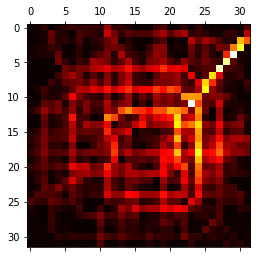

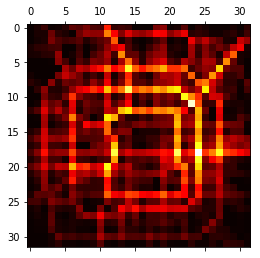

In [10]:
import matplotlib.pyplot as plt
plt.matshow(reader['data'][1][0],cmap='hot')
plt.matshow(reader['data'][100][0],cmap='hot')
plt.show()

   ![bj](img/bj.png)

        恩，果然是北京，这眼熟的框架,看来这样这数据的表示还是非常真实可靠的